In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from iminuit import cost, Minuit

In [2]:
data = pd.read_excel("a0980def2.xlsx", sheet_name = "Dataset")
M_eta_pi = data['Mass'] # M
events = data['Event']
error = 0.5*(data['hErr'] - data['lErr'])

Ma0980 = 0.9825
M_eta = 0.548
M_pi = 0.14
GR = 0.112

In [3]:
def lbd(x,y,z):
    return x**2+y**2+z**2-2*(x*y+x*z+y*z)

def GAM(M,GR=GR):
    def q(M):
        return 0.5*np.sqrt(lbd(M**2, M_eta**2, M_pi**2)/M**2)
    
    return GR*(q(M)/q(Ma0980))**3*2./(1.+(q(M)/q(Ma0980))**2)

def BWM(MR,GR,M,T=0,BETA=0):
    return np.exp(BETA*T)/(MR**2-M**2-1j*MR*GAM(M,GR))

def Lips(A,M):
    return A*np.sqrt(lbd(M**2,M_eta**2,M_pi**2))/M

def AMP100(M, A, B, C):
    return BWM(Ma0980, GR, M, T = 0, BETA = 0)*A+B+C*M

def intensity(M, A, B, C):
    return Lips(1, M)*abs(AMP100(M, A, B, C))**2

Text(0, 0.5, 'Events')

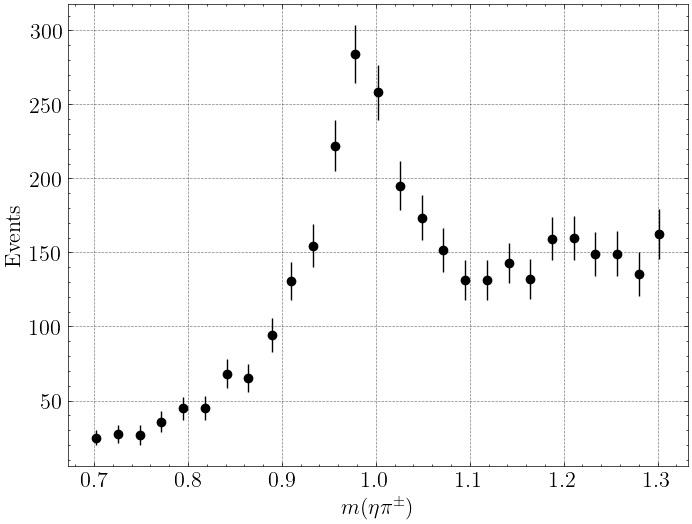

In [4]:
plt.style.use(['notebook', 'grid', 'science'])
plt.figure(figsize=(8, 6))
plt.errorbar(M_eta_pi, events, error, 0, fmt='o', c = 'black')
plt.xlabel(u'$m(\eta\pi^{\pm})$')
plt.ylabel("Events")

In [5]:
costFun = cost.LeastSquares(M_eta_pi, events, error, intensity)
m1 = Minuit(costFun, A = 0., B = 0., C = 0.)
m1.migrad()
m1.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 44.4 (χ²/ndof = 1.9)       │              Nfcn = 265              │
│ EDM = 9.07e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │  -2.332   │   0.035   │   -0.035   │   0.035    │         │         │       │
│ 1 │ B    │   -25.8   │    1.2    │    -1.2    │    1.2     │         │         │       │
│ 2 │ C    │   28.0    │    1.1    │    -1.1    │    1.1     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │           C           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.035   │   0.035   │   -1.2    │    1.2    │   -1.1    │    1.1    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       A       B       C │
├───┼─────────────────────────┤
│ A │ 0.00121 -0.0167  0.0158 │
│ B │ -0.0167     1.4    -1.3 │
│ C │  0.0158    -1.3    1.15 │
└───┴─────────────────────────┘